<h2>2<sup>η</sup> Εργαστηριακή Άσκηση</h2>

## Ανάλυση & Μελέτη Σύνθετων Τοπολογιών Δικτύου
## Μπάρμπα Παναγιώτα-Νικολέττα
## ΑΜ: 03118604
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [6]:
n = 80
d = 4
M = 300
R = 0.25
p = 0.3
k = 4
seedno = 5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n = n, k = k, p  = 0, seed = seedno)
RGER = nx.gnm_random_graph(n = n, m = M, seed = seedno)
RGG = nx.random_geometric_graph(n = n, radius = R, seed = seedno)
RGGil = nx.gnp_random_graph(n = n, p = p, seed = seedno)
SF = nx.barabasi_albert_graph(n = n, m = d, seed = seedno)
SW = nx.watts_strogatz_graph(n = n, k = k, p = p, seed = seedno)

Graphs = {'REG' : REG, 'RGER' : RGER, 'RGG' : RGG, 'RGGil' : RGGil, 'SF' : SF, 'SW' : SW }
# check all graphs are connected
for name, graph in Graphs.items():
    print(name,"is connected?", nx.is_connected(graph))

REG is connected? True
RGER is connected? True
RGG is connected? True
RGGil is connected? True
SF is connected? True
SW is connected? True


<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [3]:
#football network
football=nx.read_gml(r"football.gml")

In [4]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

In [8]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
selfLoops = nx.selfloop_edges(eu)
eu.remove_edges_from(selfLoops)
cc = max(nx.connected_components(eu), key=len)
eu = eu.subgraph(cc)

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

Text(0.5, 1.0, 'Degree Distribution of eu')

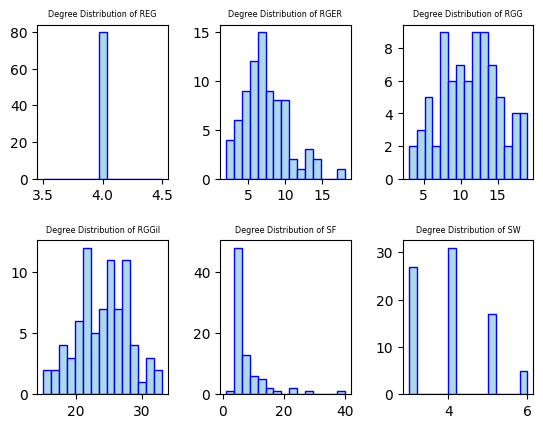

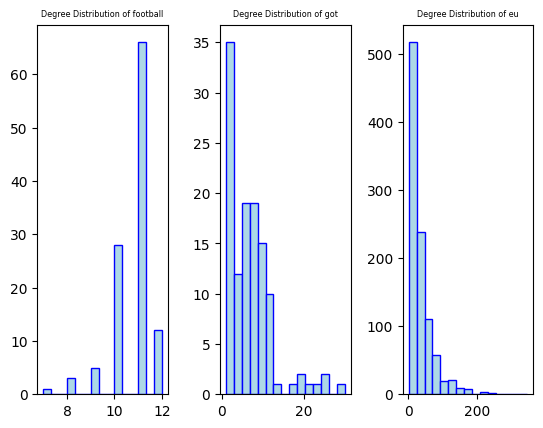

In [21]:
realGraphs = {'football' : football, 'got' : got, 'eu' : eu}

#Degree distribution for all topologies
figure1, axis = plt.subplots(2,3)
figure1.subplots_adjust(hspace=0.4,wspace=0.4)


axis[0,0].hist(list(dict(Graphs['REG'].degree).values()), bins=15, color="lightblue", ec="blue",lw=1)
axis[0,0].set_title("Degree Distribution of REG",fontsize='xx-small')

axis[0,1].hist(list(dict(Graphs['RGER'].degree).values()), bins=15, color="lightblue", ec="blue",lw=1)
axis[0,1].set_title("Degree Distribution of RGER",fontsize='xx-small')

axis[0,2].hist(list(dict(Graphs['RGG'].degree).values()), bins=15, color="lightblue", ec="blue",lw=1)
axis[0,2].set_title("Degree Distribution of RGG",fontsize='xx-small')

axis[1,0].hist(list(dict(Graphs['RGGil'].degree).values()), bins=15,color="lightblue", ec="blue",lw=1)
axis[1,0].set_title("Degree Distribution of RGGil",fontsize='xx-small')

axis[1,1].hist(list(dict(Graphs['SF'].degree).values()), bins=15, color="lightblue", ec="blue",lw=1)
axis[1,1].set_title("Degree Distribution of SF",fontsize='xx-small')

axis[1,2].hist(list(dict(Graphs['SW'].degree).values()), bins=15, color="lightblue", ec="blue",lw=1)
axis[1,2].set_title("Degree Distribution of SW",fontsize='xx-small')

figure2,axis = plt.subplots(1,3)
figure2.subplots_adjust(hspace=0.4,wspace=0.4)

axis[0].hist(list(dict(realGraphs['football'].degree).values()), bins=15, color="lightblue", ec="blue",lw=1)
axis[0].set_title("Degree Distribution of football",fontsize='xx-small')

axis[1].hist(list(dict(realGraphs['got'].degree).values()), bins=15, color="lightblue", ec="blue",lw=1)
axis[1].set_title("Degree Distribution of got",fontsize='xx-small')

axis[2].hist(list(dict(realGraphs['eu'].degree).values()), bins=15, color="lightblue", ec="blue",lw=1)
axis[2].set_title("Degree Distribution of eu",fontsize='xx-small')


#### Μέσος βαθμός κόμβου για πραγματικές και συνθετικές τοπολογίες

In [36]:
for name,graph in Graphs.items():
    dn = graph.degree()
    list_dn = [x[1] for x in dn]
    mean = np.mean(list_dn)
    print(name,"\t-> mean degree :",round(mean,3))
print("----------------------------------------------")
for name,graph in realGraphs.items():
    dn = graph.degree()
    list_dn = [x[1] for x in dn]
    mean = np.mean(list_dn)
    var = np.var(list_dn)
    print(name,"-> mean degree :",round(mean,3))

REG 	-> mean degree : 4.0
RGER 	-> mean degree : 7.5
RGG 	-> mean degree : 11.25
RGGil 	-> mean degree : 23.95
SF 	-> mean degree : 7.6
SW 	-> mean degree : 4.0
----------------------------------------------
football -> mean degree : 10.661
got -> mean degree : 6.655
eu -> mean degree : 32.584


<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

Text(0.5, 1.0, 'Clustering Coefficient Distribution of eu')

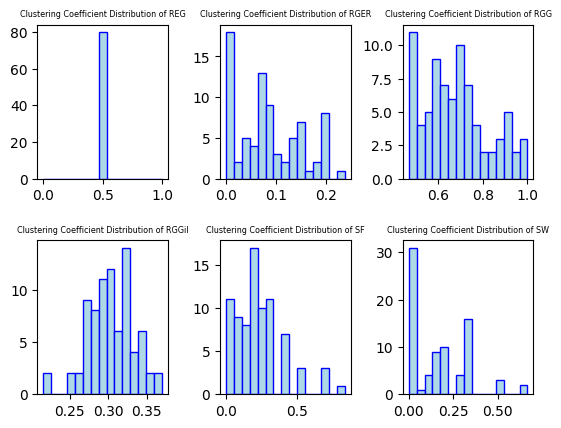

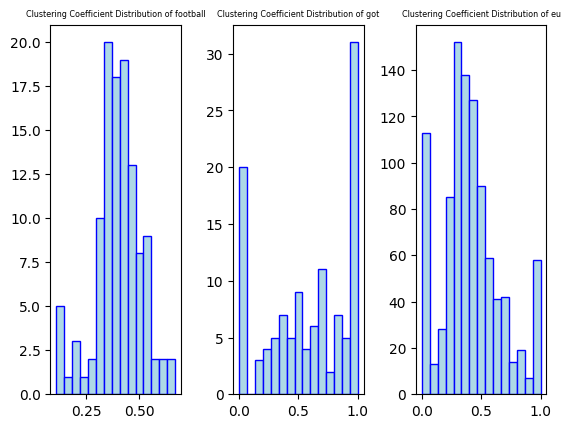

In [34]:
#returns a dictionary {node : clustering coefficient}
def cc(G):
    g = {key: round(val,4) for key, val in nx.clustering(G).items() }
    return g

figure1, axis = plt.subplots(2,3)
figure1.subplots_adjust(hspace=0.4,wspace=0.4)


axis[0,0].hist(cc(Graphs['REG']).values(), bins=15, color="lightblue", ec="blue",lw=1)
axis[0,0].set_title("Clustering Coefficient Distribution of REG",fontsize='xx-small')

axis[0,1].hist(cc(Graphs['RGER']).values(), bins=15, color="lightblue", ec="blue",lw=1)
axis[0,1].set_title("Clustering Coefficient Distribution of RGER",fontsize='xx-small')

axis[0,2].hist(cc(Graphs['RGG']).values(), bins=15, color="lightblue", ec="blue",lw=1)
axis[0,2].set_title("Clustering Coefficient Distribution of RGG",fontsize='xx-small')

axis[1,0].hist(cc(Graphs['RGGil']).values(), bins=15,color="lightblue", ec="blue",lw=1)
axis[1,0].set_title("Clustering Coefficient Distribution of RGGil",fontsize='xx-small')

axis[1,1].hist(cc(Graphs['SF']).values(), bins=15, color="lightblue", ec="blue",lw=1)
axis[1,1].set_title("Clustering Coefficient Distribution of SF",fontsize='xx-small')

axis[1,2].hist(cc(Graphs['SW']).values(), bins=15, color="lightblue", ec="blue",lw=1)
axis[1,2].set_title("Clustering Coefficient Distribution of SW",fontsize='xx-small')

figure2,axis = plt.subplots(1,3)
figure2.subplots_adjust(hspace=0.4,wspace=0.4)

axis[0].hist(cc(realGraphs['football']).values(), bins=15, color="lightblue", ec="blue",lw=1)
axis[0].set_title("Clustering Coefficient Distribution of football",fontsize='xx-small')

axis[1].hist(cc(realGraphs['got']).values(), bins=15, color="lightblue", ec="blue",lw=1)
axis[1].set_title("Clustering Coefficient Distribution of got",fontsize='xx-small')

axis[2].hist(cc(realGraphs['eu']).values(), bins=15, color="lightblue", ec="blue",lw=1)
axis[2].set_title("Clustering Coefficient Distribution of eu",fontsize='xx-small')


#### Μέσος συντελεστής ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες

In [38]:
for name,graph in Graphs.items():
    mean = nx.average_clustering(graph)
    print(name,"\t-> mean degree :",round(mean,3))
print("----------------------------------------------")
for name,graph in realGraphs.items():
    mean = nx.average_clustering(graph)
    print(name,"-> mean degree :",round(mean,3))

REG 	-> mean degree : 0.5
RGER 	-> mean degree : 0.085
RGG 	-> mean degree : 0.683
RGGil 	-> mean degree : 0.303
SF 	-> mean degree : 0.229
SW 	-> mean degree : 0.167
----------------------------------------------
football -> mean degree : 0.403
got -> mean degree : 0.574
eu -> mean degree : 0.407


<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε τις βιωλιοθήκες <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a> και <a style=text-decoration:none href='https://docs.python.org/3/library/time.html'>time</a> . Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [ ]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [ ]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

#### Οπτικοποίηση κοινοτήτων American College Football

#### Οπτικοποίηση κοινοτήτων Game of Thrones

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

#### Οπτικοποίηση κοινοτήτων REG

#### Οπτικοποίηση κοινοτήτων RGER

#### Οπτικοποίηση κοινοτήτων RGG

#### Οπτικοποίηση κοινοτήτων SW

#### Οπτικοποίηση κοινοτήτων SF